# Soft Computing

## Tugas 2: Convolutional Neural Networks

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi tugas2_NIM.ipynb.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

_Packages_ yang Anda akan gunakan dalam mengerjakan tugas ini antara lain:

- tensorflow/keras
- matplotlib
- numpy
- pandas
- pillow
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

**Nilai akhir: XX/50**

### Deskripsi Dataset

Dalam tugas ini, Anda akan mencoba melakukan klasifikasi objek melalui gambar dengan dataset [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). Data ini terdiri dari 60000 gambar berwarna dengan ukuran 32x32 pixels yang terbagi ke dalam 10 kelas. Data ini dikumpulkan oleh Alex Krizhevsky, Vinod Nair, dan Geoffrey Hinton. Tugas Anda adalah menghasilkan model yang dapat mengklasifikasikan sebaik mungkin masing-masing objek dalam dataset tersebut.

### Mengimpor Modul dan Dataset

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [10]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

## 1. Eksplorasi Awal Data dan Preprocessing (10 poin)

Pada bagian ini, kecuali dijelaskan lebih rinci, dataset yang Anda harusnya gunakan adalah `x_train`.

### Soal 1.1 (2 poin)

Tunjukkan dimensi dari data latih dan data uji.

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### Soal 1.2 (3 poin)

Ambil 1 contoh gambar dari masing-masing kelas, lalu gambarkan.

*Petunjuk: Anda dapat menggunakan `plt.imshow()`*

In [6]:
no_class = [0,1,2,3,4,5,6,7,8,9]
index = []
for i in range(len(no_class)):
  for j in range(len(y_train)):
    if no_class[i] == y_train[j]:
      index.append(j)
      break

In [12]:
index

[29, 4, 6, 9, 3, 27, 0, 7, 8, 1]

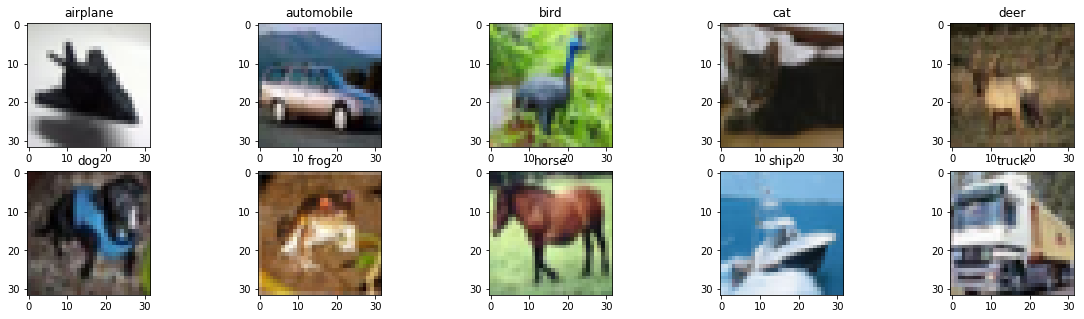

In [6]:
fig, axes = plt.subplots(2,5,figsize=(20,5))
for img, y, ax, i in zip (x_train[index], y_train[index], axes.flatten(), range(10)):
  ax.set_title(format(labels[i]))
  ax.imshow(img)
plt.show()

### Soal 1.3 (5 poin)

Anda akan melakukan dua jenis pemrosesan, untuk hitam-putih dan untuk gambar berwarna. Saat ini, Anda hanya memiliki gambar berwarna. Oleh karena itu, ubah gambar dalam data latih dan data uji menjadi hitam-putih. Caranya adalah dengan mencari nilai rata-rata dari ketiga channel RGB untuk setiap pixel. Tunjukkan 5 sampel gambar untuk memastikan bahwa warnanya sudah berubah.

In [7]:
# normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)

In [25]:
x_train_gray.shape

(50000, 32, 32, 1)

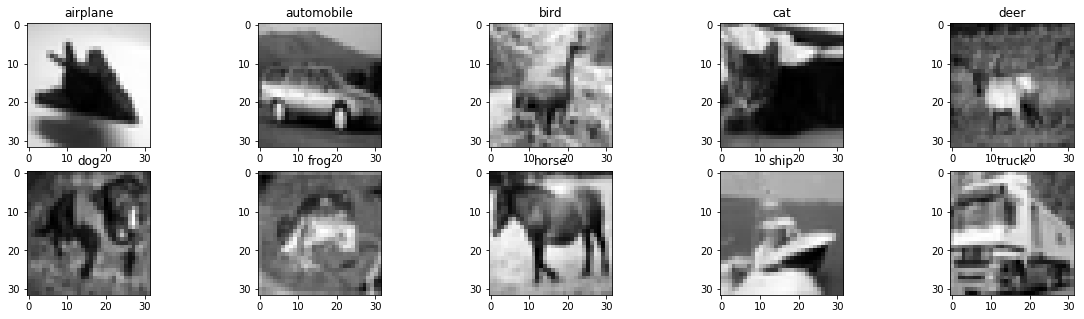

In [26]:
fig, axes = plt.subplots(2,5,figsize=(20,5))
for img, y, ax, i in zip (x_train_gray[index,:,:,0], y_train[index], axes.flatten(), range(10)):
  ax.set_title(format(labels[i]))
  ax.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

In [20]:
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
plt.show()

TypeError: data type not understood

## 2. Klasifikasi dengan Multilayer Perceptron (20 poin)

*Petunjuk: Karena melatih dalam 50 epochs dapat memakan waktu. Anda dapat menyelesaikan bagian 2 dan 3 dari tugas ini dengan menggunakan 10 epochs terlebih dahulu. Jika semua kode sudah bekerja dengan baik, Anda dapat menambahkan jumlah epochs menjadi 50 kemudian.*

### Soal 2.1 (2 poin)

Buatlah model Multilayer Perceptron (MLP) dengan input berupa gambar dalam hitam-putih. Gunakan satu hidden layer dengan 1200 ReLU hidden units.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
def mlp():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1200, activation='relu')
    ])
    return model

### Soal 2.2.a (3 poin)

Latih model yang telah Anda buat dengan *training set*. Gunakan Adam sebagai optimizer dari model Anda, `categorical_crossentropy` atau `sparse_categorical_entropy` sebagai *loss function*, 50 epochs, `validation_split` 0.2, dan akurasi sebagai *metric*. Berapa persen akurasi pada data latih dan data validasi dari model yang dihasilkan?

*Catatan: Anda mungkin saja perlu mengubah nilai gambar menjadi [0,1]. Selain itu, perlu ada perubahan dari dimensi y_train dan y_test.*

In [29]:
from keras.models import Sequential
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Dense, Dropout, Flatten

x_train_gray, x_val, y_train, y_val = train_test_split(x_train_gray,y_train,test_size=0.2,random_state=2510)

In [30]:
np.random.seed(42)

model = mlp()
#Compile mlp
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
# Train the model
hist = model.fit(x_train_gray, y_train,batch_size=100,epochs=50,verbose=1,validation_data=(x_val, y_val))
model.summary()

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 2s 61us/step - loss: 38731.4035 - acc: 5.5000e-04 - val_loss: 38172.8507 - val_acc: 0.0028
Epoch 2/50
40000/40000 [==============================] - 2s 54us/step - loss: 38411.4730 - acc: 0.0024 - val_loss: 38170.8475 - val_acc: 0.0045
Epoch 3/50
40000/40000 [==============================] - 2s 54us/step - loss: 38410.0378 - acc: 0.0029 - val_loss: 38169.8112 - val_acc: 0.0045
Epoch 4/50
40000/40000 [==============================] - 2s 54us/step - loss: 38409.2098 - acc: 0.0029 - val_loss: 38169.1576 - val_acc: 0.0043
Epoch 5/50
40000/40000 [==============================] - 2s 54us/step - loss: 38408.6630 - acc: 0.0027 - val_loss: 38168.7048 - val_acc: 0.0036
Epoch 6/50
40000/40000 [==============================] - 2s 53us/step - loss: 38408.2739 - acc: 0.0026 - val_loss: 38168.3735 - val_acc: 0.0034
Epoch 7/50
40000/40000 [==============================] - 2s 53us/step - los

### Soal 2.2.b (2 poin)

Gambarkan *learning curve* berupa akurasi dari data latih dan data validasi dari proses pelatihan di atas.

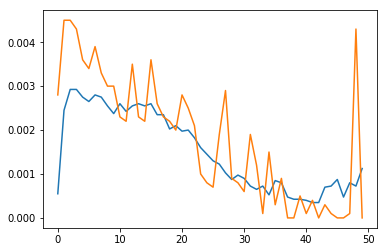

In [31]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()

### Soal 2.3 (3 poin)

Evaluasi model Anda pada data uji. Berapa akurasi yang didapatkan? Gambarkan pula *confusion matrix* dari prediksi yang Anda hasilkan terhadap nilai yang sebenarnya.

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict_classes(x_val)
cm = confusion_matrix(np.argmax(y_val,axis=1),y_pred)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")
ax.set_title('Confusion Matrix Convolutional Neural Network')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

KeyboardInterrupt: 

### Soal 2.4 (5 poin)

Coba untuk melakukan klasifikasi dengan MLP, tetapi dengan gambar yang berwarna. Anda dibebaskan untuk menentukan arsitektur neural network yang akan digunakan. Berapa akurasi pada data uji yang bisa Anda dapatkan?

In [32]:
np.random.seed(42)

def mlpc():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1200, activation='relu')
    ])
    return model

x_train, x_val = train_test_split(x_train,test_size=0.2,random_state=2510)

model = mlpc()
#Compile mlp
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
# Train the model
hist = model.fit(x_train, y_train,batch_size=100,epochs=50,verbose=1,validation_data=(x_val, y_val))
model.summary()

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 4s 93us/step - loss: 38899.6248 - acc: 0.0000e+00 - val_loss: 38312.4646 - val_acc: 3.0000e-04
Epoch 2/50
40000/40000 [==============================] - 3s 79us/step - loss: 38552.8461 - acc: 4.5000e-04 - val_loss: 38311.9772 - val_acc: 0.0000e+00
Epoch 3/50
40000/40000 [==============================] - 3s 78us/step - loss: 38552.4844 - acc: 3.7500e-04 - val_loss: 38311.7081 - val_acc: 0.0000e+00
Epoch 4/50
40000/40000 [==============================] - 3s 78us/step - loss: 38552.2615 - acc: 2.5000e-04 - val_loss: 38311.5271 - val_acc: 0.0000e+00
Epoch 5/50
40000/40000 [==============================] - 3s 79us/step - loss: 38552.1051 - acc: 2.0000e-04 - val_loss: 38311.3947 - val_acc: 0.0000e+00
Epoch 6/50
40000/40000 [==============================] - 3s 79us/step - loss: 38551.9876 - acc: 1.2500e-04 - val_loss: 38311.2921 - val_acc: 1.0000e-04
Epoch 7/50
40000/40000 [========

### Soal 2.5 (5 poin)

Apa kesimpulan yang dapat Anda ambil sejauh ini? *Petunjuk: Anda dapat membandingkan akurasi terbaik yang Anda dapatkan dengan akurasi yang mungkin didapatkan jika klasifikasinya hanya berupa model yang menebak objek secara acak (uniform random).*

*Dari pengerjaan diatas, dapat diketahui bahwa menggunakan grayscale akan lebih tinggi nilai akurasinya, karena gambar akan lebih mudah diprediksi dibandingkan yang berwarna*

## 3. Convolutional Neural Networks (20 poin)

Apakah kita bisa menghasilkan model klasifikasi yang lebih baik?

### Soal 3.1 (5 poin)

Buatlah model *convolutional neural network* untuk melakukan klasifikasi. Anda dibebaskan untuk menentukan arsitekturnya.

In [35]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications.resnet50 import ResNet50
 
application = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

def cnn():
    # Create the model
    model = models.Sequential()
 
    # Add the vgg convolutional base model
    model.add(application)
 
    # Add new layers
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
 
    # Show a summary of the model. Check the number of trainable parameters
    #model.summary()
    return model

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


### Soal 3.2 (3 poin)

Latih model dengan data latih dan gunakan 20% dari data latih sebagai validasi. Gambarkan *learning curve* dari model Anda.

In [ ]:
np.random.seed(42)

model = cnn()
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(),metrics=['acc'])
# Train the model
hist = model.fit(x_train, y_train,batch_size=1000,epochs=50,verbose=1,validation_data=(x_val, y_val))

### Soal 3.3 (5 poin)

Salah satu cara untuk menghasilkan klasifikasi yang lebih baik pada dataset berupa gambar adalah dengan melakukan augmentasi. Definisikan augmentasinya dengan `keras.preprocessing.image.ImageDataGenerator`, lalu latih ulang model Anda. Pastikan bahwa data validasi tidak diaugmentasi. Berapa akurasi yang Anda dapatkan sekarang?

In [ ]:
np.random.seed(42)

model = cnn()
# Kode Anda di sini

### Soal 3.4 (2 poin)

Lakukan klasifikasi pada data uji dengan model terbaik yang Anda hasilkan. Berapa akurasi yang Anda dapatkan? Gambarkan pula *confusion matrix*-nya!

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict_classes(x_val)
cm = confusion_matrix(np.argmax(y_val,axis=1),y_pred)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")
ax.set_title('Confusion Matrix Convolutional Neural Network')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

### Soal 3.5 (5 poin)

Berikan kesimpulan Anda dari eksplorasi yang telah Anda lakukan pada tugas ini.

*Dari tugas ini, dapat ditarik kesimpulan bahwa semakin kecil nilai dimensi, akan semakin sulit untuk diprediksi, pada tugas ini dimensi dari gambar hanya 32 x 32, dan mengakibatkan nilai akurasinya yang sangat kecil*